In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('bmi_train.csv')
val_df= pd.read_csv('bmi_validation.csv')

df.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [39]:
val_df.shape

(100, 4)

In [3]:
val_df.head()

,Gender,Height,Weight
0,Male,161,103
1,Male,180,75
2,Male,174,95
3,Female,179,103
4,Female,192,140


In [4]:
print("Duplicated df values",df.duplicated().sum())
print("Duplicated val_df values",val_df.duplicated().sum())

Duplicated df values 8
Duplicated val_df values 0


In [5]:
df= df.drop_duplicates()

In [6]:
print("Duplicated df values",df.duplicated().sum())


Duplicated df values 0


In [7]:
print("Duplicated df null values",df.isnull().sum())
print("Duplicated val_df null values",val_df.isnull().sum())

Duplicated df null values Gender    0
Height    0
Weight    0
Index     0
dtype: int64
Duplicated val_df null values Gender    0
Height    0
Weight    0
dtype: int64


In [8]:
df.describe()

,Height,Weight,Index
count,392.000000,392.000000,392.000000
mean,170.339286,106.224490,3.737245
std,16.615701,32.510012,1.379366
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,171.000000,107.000000,4.000000
75%,184.000000,137.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
val_df.describe()

,Height,Weight
count,100.000000,100.000000
mean,168.270000,105.760000
std,15.521803,32.626172
min,141.000000,51.000000
25%,156.000000,76.500000
50%,168.000000,103.500000
75%,180.250000,135.250000
max,197.000000,160.000000


<AxesSubplot:>

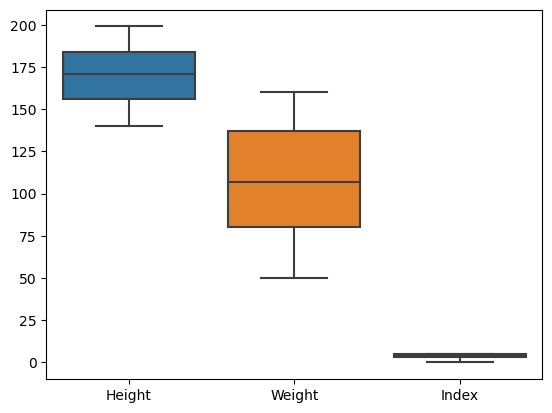

In [10]:
sns.boxplot(data=df)

<AxesSubplot:>

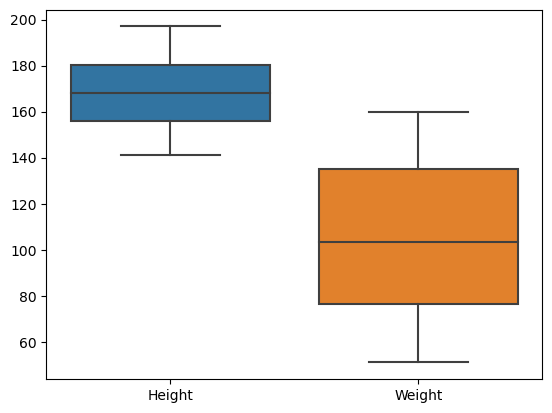

In [11]:
sns.boxplot(data=val_df)

<AxesSubplot:>

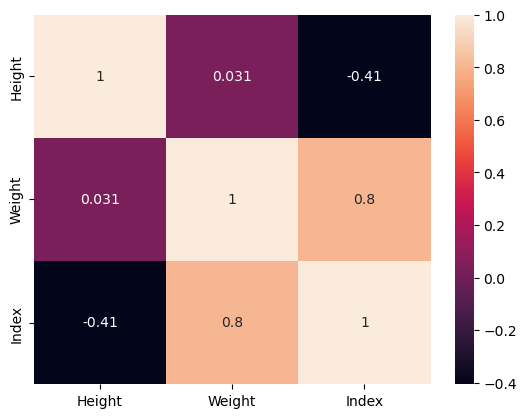

In [12]:
sns.heatmap(df.corr(), annot= True)

<AxesSubplot:>

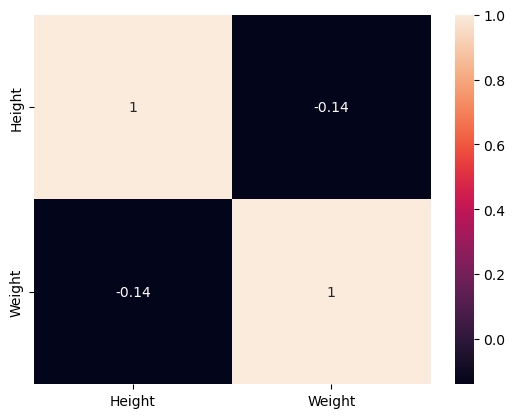

In [13]:
sns.heatmap(val_df.corr(), annot= True)

In [14]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

df['Gender']= le.fit_transform(df['Gender'])
val_df['Gender']= le.fit_transform(val_df['Gender'])

In [15]:
val_df.head()


,Gender,Height,Weight
0,1,161,103
1,1,180,75
2,1,174,95
3,0,179,103
4,0,192,140


In [16]:
df['Index'].value_counts()

5    157
4     98
3     56
2     51
1     18
0     12
Name: Index, dtype: int64

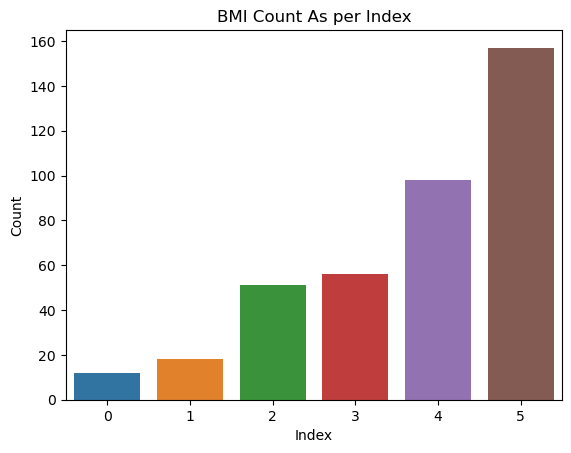

In [17]:
sns.countplot(x= 'Index', data=df)
plt.title("BMI Count As per Index")
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

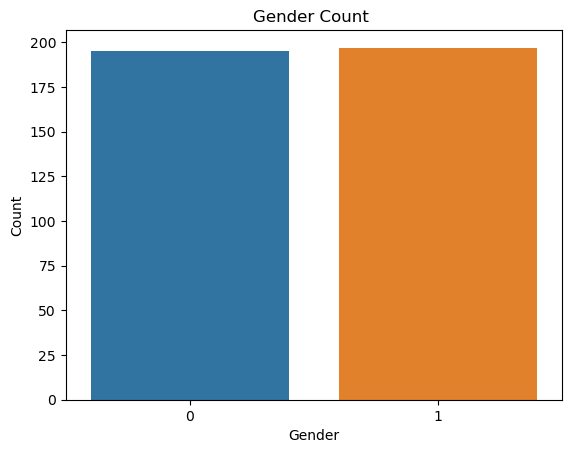

In [18]:
sns.countplot(x=df['Gender'])
plt.title("Gender Count ")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [19]:
X= df.drop('Index', axis= 1)
y= df['Index']

In [28]:
from  sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(294, 3) (98, 3) (294,) (98,)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Create a dictionary of classifiers with hyperparameters
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', C=1.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=1)
}

# Create a dictionary of classifiers with hyperparameters
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', C=1.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
}

# Store results including training and testing scores and classification report
best_model = None
best_accuracy = 0.0

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Calculate training score
    train_score = clf.score(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print()
    
    # Check if this model has the highest accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = clf

# Print the best model details
if best_model is not None:
    print("Best Model (Highest Testing Accuracy):")
    print(best_model)

Classifier: K-Nearest Neighbors
Training Score: 0.9150
Testing Accuracy: 0.9184
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.89      0.80      0.84        10
           2       0.71      0.83      0.77         6
           3       1.00      0.83      0.91        18
           4       0.88      0.96      0.92        24
           5       0.97      0.97      0.97        35

    accuracy                           0.92        98
   macro avg       0.88      0.90      0.89        98
weighted avg       0.92      0.92      0.92        98


Classifier: Support Vector Machine
Training Score: 0.9490
Testing Accuracy: 0.9184
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.90      0.95        10
           2       0.67      1.00      0.80         6
           3       1.00      0

In [31]:
y_pred = best_model.predict(val_df)

In [33]:
val_df['Index']=y_pred

In [35]:
data = pd.concat([df,val_df])

In [42]:
data.to_csv("Final_Data.csv",index=False)